In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from pickle import dump

In [142]:
data = pd.read_csv("./data/ATP.csv")
data

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169685,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,...,22.740000,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169686,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,...,20.180000,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
169687,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,...,28.780000,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
169688,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,...,22.740000,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169690 entries, 0 to 169689
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   best_of             169690 non-null  int64  
 1   draw_size           1232 non-null    float64
 2   l_1stIn             83415 non-null   float64
 3   l_1stWon            83415 non-null   float64
 4   l_2ndWon            83415 non-null   float64
 5   l_SvGms             83415 non-null   float64
 6   l_ace               83415 non-null   float64
 7   l_bpFaced           83415 non-null   float64
 8   l_bpSaved           83415 non-null   float64
 9   l_df                83415 non-null   float64
 10  l_svpt              83415 non-null   float64
 11  loser_age           164700 non-null  float64
 12  loser_entry         25339 non-null   object 
 13  loser_hand          169605 non-null  object 
 14  loser_ht            139052 non-null  float64
 15  loser_id            169690 non-nul

In [144]:
data_filtered = data.drop(columns=["best_of", "draw_size","loser_name","winner_name","loser_entry","winner_entry","loser_seed","winner_seed", "match_num", "minutes", "round", "score", "surface", "tourney_date","tourney_name", "tourney_id", "tourney_level"]).dropna()
data_filtered.head()

,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,...,w_bpSaved,w_df,w_svpt,winner_age,winner_hand,winner_ht,winner_id,winner_ioc,winner_rank,winner_rank_points
76863,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,...,5.0,0.0,53.0,25.61,R,180.0,101142,ESP,9.0,1487.0
76864,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,...,1.0,1.0,56.0,21.55,R,180.0,101613,USA,94.0,371.0
76865,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,...,2.0,4.0,80.0,25.32,R,185.0,101179,FRA,77.0,468.0
76866,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,23.85,...,6.0,1.0,82.0,25.83,R,180.0,101117,GER,65.0,502.0
76867,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,20.70,...,2.0,4.0,65.0,19.71,R,185.0,101901,USA,190.0,142.0


In [145]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   l_1stIn             75881 non-null  float64
 1   l_1stWon            75881 non-null  float64
 2   l_2ndWon            75881 non-null  float64
 3   l_SvGms             75881 non-null  float64
 4   l_ace               75881 non-null  float64
 5   l_bpFaced           75881 non-null  float64
 6   l_bpSaved           75881 non-null  float64
 7   l_df                75881 non-null  float64
 8   l_svpt              75881 non-null  float64
 9   loser_age           75881 non-null  float64
 10  loser_hand          75881 non-null  object 
 11  loser_ht            75881 non-null  float64
 12  loser_id            75881 non-null  int64  
 13  loser_ioc           75881 non-null  object 
 14  loser_rank          75881 non-null  float64
 15  loser_rank_points   75881 non-null  float64
 16 

In [146]:
dict_hand = {k:i for i,k in enumerate(np.unique(pd.concat([data_filtered["loser_hand"],data_filtered["winner_hand"]],axis=0)))}
dict_ioc = {k:i for i,k in enumerate(np.unique(pd.concat([data_filtered["loser_ioc"],data_filtered["winner_ioc"]],axis=0)))}

In [147]:
dict_hand

{'L': 0, 'R': 1, 'U': 2}

In [173]:
dump([dict_hand, dict_ioc], open('dicts.pkl', 'wb'))

In [148]:
data_filtered["winner_hand"] = data_filtered["winner_hand"].apply(lambda x: dict_hand[x])
data_filtered["loser_hand"] = data_filtered["loser_hand"].apply(lambda x: dict_hand[x])
data_filtered["winner_ioc"] = data_filtered["winner_ioc"].apply(lambda x: dict_ioc[x])
data_filtered["loser_ioc"] = data_filtered["loser_ioc"].apply(lambda x: dict_ioc[x])

In [149]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   l_1stIn             75881 non-null  float64
 1   l_1stWon            75881 non-null  float64
 2   l_2ndWon            75881 non-null  float64
 3   l_SvGms             75881 non-null  float64
 4   l_ace               75881 non-null  float64
 5   l_bpFaced           75881 non-null  float64
 6   l_bpSaved           75881 non-null  float64
 7   l_df                75881 non-null  float64
 8   l_svpt              75881 non-null  float64
 9   loser_age           75881 non-null  float64
 10  loser_hand          75881 non-null  int64  
 11  loser_ht            75881 non-null  float64
 12  loser_id            75881 non-null  int64  
 13  loser_ioc           75881 non-null  int64  
 14  loser_rank          75881 non-null  float64
 15  loser_rank_points   75881 non-null  float64
 16 

In [150]:
data_filtered.columns = ['first_1stIn', 'first_1stWon', 'first_2ndWon', 'first_SvGms', 'first_ace',
       'first_bpFaced', 'first_bpSaved', 'first_df', 'first_svpt', 'first_age', 'first_hand',
       'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points',
       'second_1stIn', 'second_1stWon',
       'second_2ndWon', 'second_SvGms', 'second_ace', 'second_bpFaced', 'second_bpSaved', 'second_df',
       'second_svpt', 'second_age', 'second_hand', 'second_ht', 'second_id',
       'second_ioc', 'second_rank', 'second_rank_points']
data_filtered["class"]=1
data_filtered.head()

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,...,0.0,53.0,25.61,1,180.0,101142,24,9.0,1487.0,1
76864,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,...,1.0,56.0,21.55,1,180.0,101613,78,94.0,371.0,1
76865,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,...,4.0,80.0,25.32,1,185.0,101179,27,77.0,468.0,1
76866,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,23.85,...,1.0,82.0,25.83,1,180.0,101117,30,65.0,502.0,1
76867,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,20.70,...,4.0,65.0,19.71,1,185.0,101901,78,190.0,142.0,1


In [151]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_1stIn         75881 non-null  float64
 1   first_1stWon        75881 non-null  float64
 2   first_2ndWon        75881 non-null  float64
 3   first_SvGms         75881 non-null  float64
 4   first_ace           75881 non-null  float64
 5   first_bpFaced       75881 non-null  float64
 6   first_bpSaved       75881 non-null  float64
 7   first_df            75881 non-null  float64
 8   first_svpt          75881 non-null  float64
 9   first_age           75881 non-null  float64
 10  first_hand          75881 non-null  int64  
 11  first_ht            75881 non-null  float64
 12  first_id            75881 non-null  int64  
 13  first_ioc           75881 non-null  int64  
 14  first_rank          75881 non-null  float64
 15  first_rank_points   75881 non-null  float64
 16 

In [152]:
data_filtered_switched = data_filtered.copy(deep=True)
cols = data_filtered_switched.columns.tolist()
cols

['first_1stIn',
 'first_1stWon',
 'first_2ndWon',
 'first_SvGms',
 'first_ace',
 'first_bpFaced',
 'first_bpSaved',
 'first_df',
 'first_svpt',
 'first_age',
 'first_hand',
 'first_ht',
 'first_id',
 'first_ioc',
 'first_rank',
 'first_rank_points',
 'second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points',
 'class']

In [153]:
cols[16:32]

['second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points']

In [154]:
cols_switched = cols[16:32] + cols[0:16]
cols_switched

['second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points',
 'first_1stIn',
 'first_1stWon',
 'first_2ndWon',
 'first_SvGms',
 'first_ace',
 'first_bpFaced',
 'first_bpSaved',
 'first_df',
 'first_svpt',
 'first_age',
 'first_hand',
 'first_ht',
 'first_id',
 'first_ioc',
 'first_rank',
 'first_rank_points']

In [155]:
data_filtered_switched = data_filtered_switched[cols_switched]
data_filtered_switched

,second_1stIn,second_1stWon,second_2ndWon,second_SvGms,second_ace,second_bpFaced,second_bpSaved,second_df,second_svpt,second_age,...,first_bpSaved,first_df,first_svpt,first_age,first_hand,first_ht,first_id,first_ioc,first_rank,first_rank_points
76863,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,25.61,...,2.0,0.0,46.0,20.64,1,175.0,101746,39,78.0,459.0
76864,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,21.55,...,7.0,7.0,56.0,31.82,1,188.0,100587,55,220.0,114.0
76865,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,25.32,...,4.0,3.0,68.0,21.70,1,185.0,101601,55,212.0,116.0
76866,55.0,35.0,14.0,13.0,0.0,10.0,6.0,1.0,82.0,25.83,...,8.0,2.0,96.0,23.85,0,173.0,101332,38,72.0,483.0
76867,46.0,34.0,12.0,10.0,4.0,2.0,2.0,4.0,65.0,19.71,...,4.0,3.0,49.0,20.70,1,196.0,101735,3,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169648,55.0,43.0,15.0,14.0,10.0,3.0,2.0,2.0,78.0,37.55,...,2.0,4.0,70.0,35.28,0,188.0,104269,24,32.0,1200.0
169650,52.0,42.0,21.0,15.0,19.0,5.0,4.0,1.0,86.0,27.01,...,5.0,3.0,100.0,30.87,1,183.0,105138,24,18.0,1955.0
169652,30.0,21.0,14.0,9.0,3.0,1.0,0.0,0.0,51.0,28.68,...,5.0,2.0,61.0,26.52,1,180.0,106045,78,68.0,770.0
169653,37.0,28.0,9.0,9.0,6.0,7.0,6.0,2.0,56.0,32.48,...,2.0,0.0,44.0,33.69,1,183.0,104571,18,128.0,450.0


In [156]:
data_filtered_switched.columns = ['first_1stIn', 'first_1stWon', 'first_2ndWon', 'first_SvGms', 'first_ace',
       'first_bpFaced', 'first_bpSaved', 'first_df', 'first_svpt', 'first_age', 'first_hand',
       'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points',
       'second_1stIn', 'second_1stWon',
       'second_2ndWon', 'second_SvGms', 'second_ace', 'second_bpFaced', 'second_bpSaved', 'second_df',
       'second_svpt', 'second_age', 'second_hand', 'second_ht', 'second_id',
       'second_ioc', 'second_rank', 'second_rank_points']
data_filtered_switched["class"]=0
data_filtered_switched.head()

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,25.61,...,0.0,46.0,20.64,1,175.0,101746,39,78.0,459.0,0
76864,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,21.55,...,7.0,56.0,31.82,1,188.0,100587,55,220.0,114.0,0
76865,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,25.32,...,3.0,68.0,21.70,1,185.0,101601,55,212.0,116.0,0
76866,55.0,35.0,14.0,13.0,0.0,10.0,6.0,1.0,82.0,25.83,...,2.0,96.0,23.85,0,173.0,101332,38,72.0,483.0,0
76867,46.0,34.0,12.0,10.0,4.0,2.0,2.0,4.0,65.0,19.71,...,3.0,49.0,20.70,1,196.0,101735,3,28.0,876.0,0


In [157]:
data_filtered_switched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_1stIn         75881 non-null  float64
 1   first_1stWon        75881 non-null  float64
 2   first_2ndWon        75881 non-null  float64
 3   first_SvGms         75881 non-null  float64
 4   first_ace           75881 non-null  float64
 5   first_bpFaced       75881 non-null  float64
 6   first_bpSaved       75881 non-null  float64
 7   first_df            75881 non-null  float64
 8   first_svpt          75881 non-null  float64
 9   first_age           75881 non-null  float64
 10  first_hand          75881 non-null  int64  
 11  first_ht            75881 non-null  float64
 12  first_id            75881 non-null  int64  
 13  first_ioc           75881 non-null  int64  
 14  first_rank          75881 non-null  float64
 15  first_rank_points   75881 non-null  float64
 16 

In [158]:
dataset = pd.concat([data_filtered,data_filtered_switched],axis=0)
dataset

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,...,0.0,53.0,25.61,1,180.0,101142,24,9.0,1487.0,1
76864,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,...,1.0,56.0,21.55,1,180.0,101613,78,94.0,371.0,1
76865,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,...,4.0,80.0,25.32,1,185.0,101179,27,77.0,468.0,1
76866,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,23.85,...,1.0,82.0,25.83,1,180.0,101117,30,65.0,502.0,1
76867,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,20.70,...,4.0,65.0,19.71,1,185.0,101901,78,190.0,142.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169648,55.0,43.0,15.0,14.0,10.0,3.0,2.0,2.0,78.0,37.55,...,4.0,70.0,35.28,0,188.0,104269,24,32.0,1200.0,0
169650,52.0,42.0,21.0,15.0,19.0,5.0,4.0,1.0,86.0,27.01,...,3.0,100.0,30.87,1,183.0,105138,24,18.0,1955.0,0
169652,30.0,21.0,14.0,9.0,3.0,1.0,0.0,0.0,51.0,28.68,...,2.0,61.0,26.52,1,180.0,106045,78,68.0,770.0,0
169653,37.0,28.0,9.0,9.0,6.0,7.0,6.0,2.0,56.0,32.48,...,0.0,44.0,33.69,1,183.0,104571,18,128.0,450.0,0


In [159]:
dataset = dataset.sample(frac=1)
X, y = dataset.iloc[:,:-1], dataset["class"]
dataset

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
90086,47.0,29.0,17.0,15.0,1.0,14.0,7.0,8.0,100.0,32.79,...,5.0,104.0,20.81,1,183.0,102247,39,34.0,909.0,1
139957,45.0,31.0,25.0,14.0,2.0,9.0,6.0,0.0,88.0,23.87,...,2.0,83.0,27.38,1,180.0,103857,64,43.0,1460.0,0
106801,29.0,17.0,15.0,9.0,1.0,6.0,3.0,3.0,53.0,19.72,...,3.0,61.0,24.16,1,185.0,102450,28,10.0,2452.0,1
125335,23.0,21.0,13.0,8.0,3.0,0.0,0.0,0.0,40.0,26.26,...,0.0,49.0,26.44,1,175.0,103133,27,93.0,431.0,0
117624,77.0,59.0,17.0,16.0,7.0,5.0,4.0,2.0,113.0,20.45,...,5.0,113.0,29.17,1,188.0,102162,78,156.0,248.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98354,43.0,24.0,9.0,9.0,1.0,5.0,2.0,0.0,58.0,23.05,...,4.0,64.0,28.79,0,180.0,101404,4,2.0,3688.0,1
119140,62.0,44.0,17.0,16.0,2.0,14.0,10.0,5.0,101.0,23.60,...,3.0,102.0,29.62,1,178.0,102148,27,38.0,920.0,0
151366,56.0,44.0,16.0,12.0,16.0,3.0,3.0,4.0,84.0,26.77,...,1.0,74.0,31.07,0,188.0,103852,24,34.0,1085.0,0
162946,39.0,26.0,20.0,11.0,2.0,1.0,0.0,1.0,67.0,30.75,...,3.0,70.0,34.51,1,175.0,103970,24,13.0,2455.0,1


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_bpSaved,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points
138266,38.0,27.0,14.0,11.0,2.0,3.0,0.0,4.0,69.0,27.35,...,3.0,5.0,57.0,24.98,1,185.0,104214,64,34.0,940.0
111983,48.0,38.0,10.0,12.0,4.0,5.0,3.0,1.0,78.0,22.12,...,4.0,6.0,82.0,22.93,1,196.0,103018,8,60.0,657.0
163266,42.0,29.0,16.0,12.0,1.0,4.0,0.0,4.0,76.0,32.02,...,8.0,2.0,102.0,22.86,1,185.0,106298,27,15.0,2156.0
98024,39.0,30.0,15.0,10.0,5.0,6.0,5.0,6.0,67.0,27.14,...,0.0,3.0,69.0,25.16,1,190.0,101900,70,90.0,512.0
167092,41.0,23.0,17.0,13.0,4.0,6.0,1.0,4.0,71.0,20.96,...,5.0,10.0,84.0,36.01,1,175.0,103970,24,33.0,1405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158860,73.0,57.0,22.0,20.0,9.0,11.0,6.0,2.0,126.0,28.02,...,8.0,11.0,124.0,33.14,1,175.0,103970,24,8.0,4490.0
109580,99.0,60.0,25.0,21.0,3.0,21.0,14.0,5.0,149.0,32.07,...,9.0,2.0,148.0,27.52,1,175.0,102021,78,62.0,716.0
109826,61.0,44.0,28.0,16.0,15.0,11.0,7.0,4.0,115.0,24.61,...,3.0,5.0,108.0,25.46,1,180.0,102374,24,10.0,2161.0
150252,43.0,27.0,21.0,13.0,6.0,4.0,1.0,0.0,78.0,25.36,...,3.0,1.0,90.0,26.86,1,194.0,104594,3,82.0,616.0


In [161]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dump(scaler, open('scaler.pkl', 'wb'))


In [162]:
clf4=lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=200,learning_rate=0.01,n_estimators=1000,reg_alpha=1.0,reg_lambda=1.0)
clf4.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=200,
               reg_alpha=1.0, reg_lambda=1.0)

In [163]:
y_pred=clf4.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.9410366998123079


In [172]:
print(np.shape(X_test))
print(np.shape(y_pred))

(50082, 32)
(50082,)


In [164]:
X_test[0]

array([ 1.00488048,  0.43951104, -0.8259828 , -0.06523881, -0.51670584,
        1.79807816,  1.79565295, -0.44170869,  0.45697635, -0.5764139 ,
        0.41281858, -0.02635698,  0.81424853,  1.01846037,  1.11593278,
       -0.6599515 , -0.18312806, -0.18795919, -0.54685106, -0.06498657,
       -0.71666409, -0.4431106 , -0.67029976,  1.14110879, -0.35281277,
        0.4954927 ,  0.40979518,  0.73005432,  0.22166695, -1.43780242,
       -0.56740877, -0.03869208])

In [165]:
y_pred[0]

1

<BarContainer object of 32 artists>

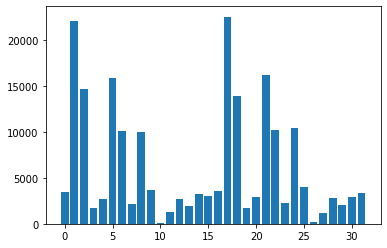

In [166]:
plt.bar(np.arange(len(X.columns)),clf4.feature_importances_)

In [167]:
for i,j in enumerate(X.columns):
    print(i,j)

0 first_1stIn
1 first_1stWon
2 first_2ndWon
3 first_SvGms
4 first_ace
5 first_bpFaced
6 first_bpSaved
7 first_df
8 first_svpt
9 first_age
10 first_hand
11 first_ht
12 first_id
13 first_ioc
14 first_rank
15 first_rank_points
16 second_1stIn
17 second_1stWon
18 second_2ndWon
19 second_SvGms
20 second_ace
21 second_bpFaced
22 second_bpSaved
23 second_df
24 second_svpt
25 second_age
26 second_hand
27 second_ht
28 second_id
29 second_ioc
30 second_rank
31 second_rank_points


In [168]:
clf4.booster_.save_model('lgbr_model.txt')